In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scipy
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

###  Loading the Datasets

In [3]:
appli_data=pd.read_csv("application_data.csv")

In [4]:
appli_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Lets Check the Shape of the Data Frame (rows,columns)
appli_data.shape

(307511, 122)

In [6]:
appli_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64



* Looking at the Dtypes of the Columns we can easily have a look at it that even the boolean datatypes are counted as numerical datatypes we need to make a note of them
* As the dataset is large lets catagerize the data into numreicial, catagorical and boolean so its easy for us to understand the data easily and handle the data

## Boolean Datatype Columns

In [7]:
def bool_dtypes(df):
    bool_columns=[]
    for feature in df.columns:
        if(([0,1] in df[feature].unique()) or ([1,0] in df[feature].unique()) ):
            bool_columns.append(feature)
    return bool_columns

In [8]:
bool_columns=bool_dtypes(appli_data)


In [9]:
appli_data[bool_columns].head()

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### Lets Check for the Overall Missing Values and Missing Percentage In Entier Dataset

In [10]:
missing_data=appli_data.isna().aggregate(['mean','sum'],axis=0).T
missing_data=missing_data[missing_data["sum"]>0].sort_values(["sum"],ascending=False)
missing_data["mean"]=missing_data["mean"]*100
missing_data

,mean,sum
COMMONAREA_MEDI,69.872297,214865.0
COMMONAREA_AVG,69.872297,214865.0
COMMONAREA_MODE,69.872297,214865.0
NONLIVINGAPARTMENTS_MEDI,69.432963,213514.0
NONLIVINGAPARTMENTS_MODE,69.432963,213514.0
NONLIVINGAPARTMENTS_AVG,69.432963,213514.0
FONDKAPREMONT_MODE,68.386172,210295.0
LIVINGAPARTMENTS_MODE,68.354953,210199.0
LIVINGAPARTMENTS_MEDI,68.354953,210199.0
LIVINGAPARTMENTS_AVG,68.354953,210199.0


In [11]:
missing_data.shape

(67, 2)

## Bolean Missing Data

In [12]:
bool_missing=missing_data[missing_data.index.isin(bool_columns)].index
missing_data[missing_data.index.isin(bool_columns)]

,mean,sum


* There is No Missing Data For Boolean Data

### Numerical datatype Columns
* From the dtypes of the application data the boolean datatype is included as numerical now lets write a for loop in which we only select the column names of numerical datatype and the column name should not be in the bool_column. So we only get the numerical datatype column names

In [13]:
numerical_columns=[feature for feature in appli_data.columns if ((feature not in bool_columns ) and (appli_data[feature].dtype == np.number))]

In [14]:
len(numerical_columns)

65

In [15]:
appli_data[numerical_columns].head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,NaN,2.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,NaN,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


### Catagorical Datatype Columns

### Lets Check for the Missing Values and Missing Percentage

In [16]:
missing_data=appli_data.isna().aggregate(['mean','sum'],axis=0).T
missing_data=missing_data[missing_data["sum"]>0].sort_values(["sum"],ascending=False)
missing_data["mean"]=missing_data["mean"]*100
missing_data.head()

,mean,sum
COMMONAREA_MEDI,69.872297,214865.0
COMMONAREA_AVG,69.872297,214865.0
COMMONAREA_MODE,69.872297,214865.0
NONLIVINGAPARTMENTS_MEDI,69.432963,213514.0
NONLIVINGAPARTMENTS_MODE,69.432963,213514.0


* There is No Missing Data in the Boolean data
* In The Catagorical Data there are missing values of 5 columns
* In the Numerical Data there are huge numeer of Missing values. for 61 out of 65 Columns The Data is Missing 

## Handling Numerical Data

In [17]:
# First 5 values of the Numerical Missing columns
num_missing=missing_data[missing_data.index.isin(numerical_columns)].index
appli_data[num_missing].head()

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,FLOORSMIN_MODE,FLOORSMIN_MEDI,FLOORSMIN_AVG,YEARS_BUILD_MODE,YEARS_BUILD_MEDI,YEARS_BUILD_AVG,OWN_CAR_AGE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,BASEMENTAREA_MEDI,BASEMENTAREA_AVG,BASEMENTAREA_MODE,EXT_SOURCE_1,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,ELEVATORS_AVG,APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,ENTRANCES_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,FLOORSMAX_MEDI,FLOORSMAX_AVG,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,TOTALAREA_MODE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_YEAR,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE
0,0.0144,0.0143,0.0144,0.0000,0.0,0.0000,0.022,0.0205,0.0202,0.1250,0.1250,0.1250,0.6341,0.6243,0.6192,NaN,0.0369,0.0375,0.0377,0.0369,0.0369,0.0383,0.083037,0.00,0.0,0.0000,0.00,0.0000,0.00,0.0252,0.0250,0.0247,0.0690,0.0690,0.0690,0.0193,0.0198,0.0190,0.0833,0.0833,0.0833,0.9722,0.9722,0.9722,0.0149,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,0.262949,351000.0,24700.5,1.0,-1134.0
1,0.0608,0.0605,0.0497,0.0039,0.0,0.0039,0.079,0.0787,0.0773,0.3333,0.3333,0.3333,0.8040,0.7987,0.7960,NaN,0.0130,0.0132,0.0128,0.0529,0.0529,0.0538,0.311267,0.01,0.0,0.0098,0.08,0.0806,0.08,0.0924,0.0968,0.0959,0.0345,0.0345,0.0345,0.0558,0.0554,0.0549,0.2917,0.2917,0.2917,0.9851,0.9851,0.9851,0.0714,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.622246,1129500.0,35698.5,2.0,-828.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.555912,135000.0,6750.0,1.0,-815.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,2.0,0.650442,297000.0,29686.5,2.0,-617.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,513000.0,21865.5,1.0,-1106.0


In [18]:
# Numerical columns missing data info
num_missing_df=missing_data[missing_data.index.isin(numerical_columns)]
num_missing_df

,mean,sum
COMMONAREA_MEDI,69.872297,214865.0
COMMONAREA_AVG,69.872297,214865.0
COMMONAREA_MODE,69.872297,214865.0
NONLIVINGAPARTMENTS_MEDI,69.432963,213514.0
NONLIVINGAPARTMENTS_MODE,69.432963,213514.0
NONLIVINGAPARTMENTS_AVG,69.432963,213514.0
LIVINGAPARTMENTS_MODE,68.354953,210199.0
LIVINGAPARTMENTS_MEDI,68.354953,210199.0
LIVINGAPARTMENTS_AVG,68.354953,210199.0
FLOORSMIN_MODE,67.848630,208642.0


* The Numerical Data is missing too much for the data analytics 
* The Data missing for the numeircal column For Most of the data with >48% missing values deals about the mean median mode of the user house property and car age. as the missing values are super high `imputing the values with mean/median/mode will result huge disturbance in the disturbution of the data`(disturbance in probability plot and a steep peak at a point in the bell curve) we will ignore these columns for the time being.
* we replace the values of the columns with columns `missing values <20% and >1% using Machine learning model`
* we will plot an distribution plot for the columns with `missing values <1% replacing values by mean,median, and droping null values` and look at the disturbance in the bell curve and select the best fit.

In [19]:
missing_data.shape

(67, 2)

In [20]:
drop_num=num_missing_df[num_missing_df["mean"]>40].index
drop_num

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_AVG',
       'LANDAREA_MEDI', 'LANDAREA_MODE', 'BASEMENTAREA_MEDI',
       'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'APARTMENTS_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'LIVINGAREA_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BEGINEXPLUATATION_MOD

In [21]:
# dropping the columns with the missing values >48%
print("Shape of the data before dropping columns",appli_data.shape)
appli_data.drop(drop_num,axis=1,inplace=True)
print("Shape of the data after dropping columns",appli_data.shape)

Shape of the data before dropping columns (307511, 122)
Shape of the data after dropping columns (307511, 77)


In [22]:
# remove the dropped columns from numerical data
print("lenght of the numerical_columns list before removing",len(numerical_columns))
for column in drop_num:
    if column in numerical_columns:
        numerical_columns.remove(column)
print("lenght of the numerical_columns list After removing",len(numerical_columns))

lenght of the numerical_columns list before removing 65
lenght of the numerical_columns list After removing 20


In [23]:
num_missing_df=num_missing_df[~(num_missing_df["mean"]>40)]

In [24]:
# Now Lets deal with the numerical columns with <1% data missing 
miss_df=num_missing_df[num_missing_df["mean"]<1]
miss_df

,mean,sum
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,1021.0
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,1021.0
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,1021.0
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,1021.0
EXT_SOURCE_2,0.214626,660.0
AMT_GOODS_PRICE,0.090403,278.0
AMT_ANNUITY,0.003902,12.0
CNT_FAM_MEMBERS,0.000650,2.0
DAYS_LAST_PHONE_CHANGE,0.000325,1.0


In [25]:
# as the missing data is very low we will impute the com

In [26]:
appli_data[miss_df.index].aggregate(['mean','median','std']).T

,mean,median,std
DEF_30_CNT_SOCIAL_CIRCLE,0.143421,0.000000,0.446698
OBS_60_CNT_SOCIAL_CIRCLE,1.405292,0.000000,2.379803
DEF_60_CNT_SOCIAL_CIRCLE,0.100049,0.000000,0.362291
OBS_30_CNT_SOCIAL_CIRCLE,1.422245,0.000000,2.400989
EXT_SOURCE_2,0.514393,0.565961,0.191060
AMT_GOODS_PRICE,538396.207429,450000.000000,369446.460540
AMT_ANNUITY,27108.573909,24903.000000,14493.737315
CNT_FAM_MEMBERS,2.152665,2.000000,0.910682
DAYS_LAST_PHONE_CHANGE,-962.858788,-757.000000,826.808487


In [27]:
#The difference b/w mean and median is low so we will impute missing values with mean
appli_data[miss_df.index]=appli_data[miss_df.index].fillna(appli_data[miss_df.index].mean())

In [28]:
num_missing_df=num_missing_df[~(num_missing_df["mean"]<1)]
num_missing_df

,mean,sum
EXT_SOURCE_3,19.825307,60965.0
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631,41519.0
AMT_REQ_CREDIT_BUREAU_DAY,13.501631,41519.0
AMT_REQ_CREDIT_BUREAU_MON,13.501631,41519.0
AMT_REQ_CREDIT_BUREAU_QRT,13.501631,41519.0
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631,41519.0
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631,41519.0


* To Get Most accurate values we can impute these values by building an machine learning model. How ever its computationally expensive as we have a very large dataset. lets check for each variable distribution plt and impute them manually with bet fit mean, median, mode.

In [29]:
def dist_plot(df,title):
    plt.figure(figsize=(12,7))
    plt.title(title)
    sns.kdeplot(df,color='red',alpha=0.9,label='Original')
    sns.kdeplot(df.fillna(df.mean()),color='blue',alpha=0.8,label='mean')
    sns.kdeplot(df.fillna(df.median()),color='violet',alpha=0.8,label='median')
    sns.kdeplot(df.fillna(df.mode()),color='green',alpha=0.8,label='mode')
    plt.legend()
    plt.show()

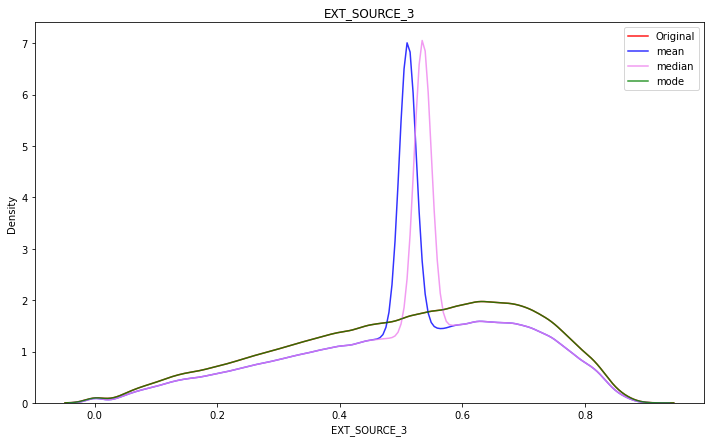

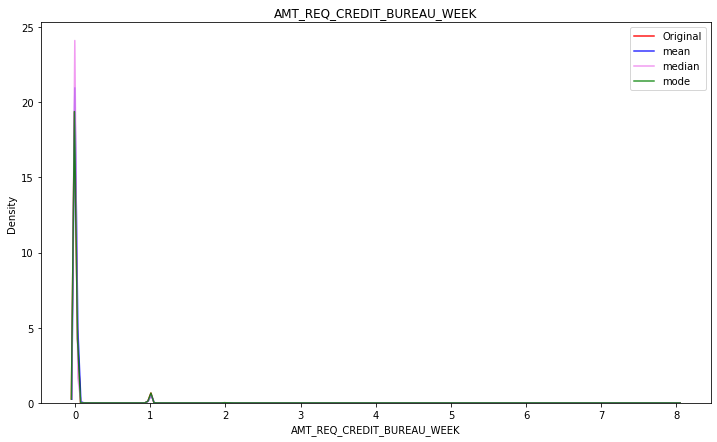

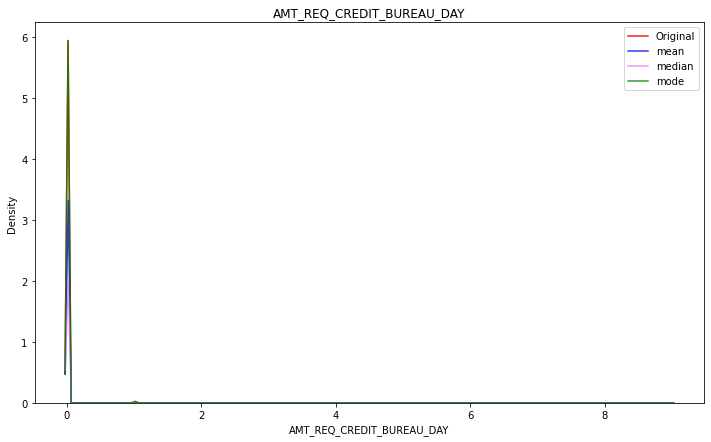

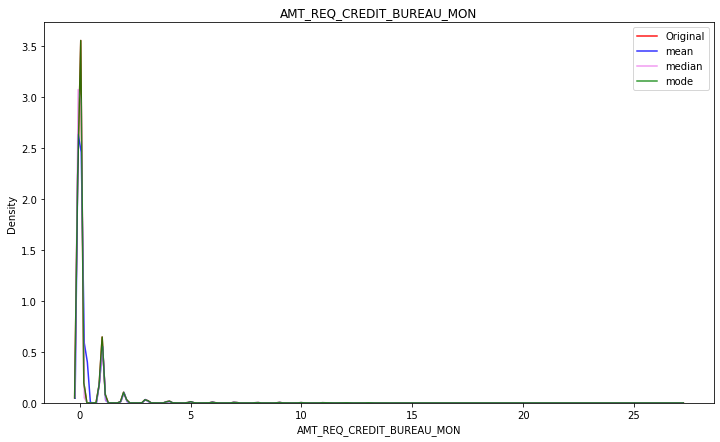

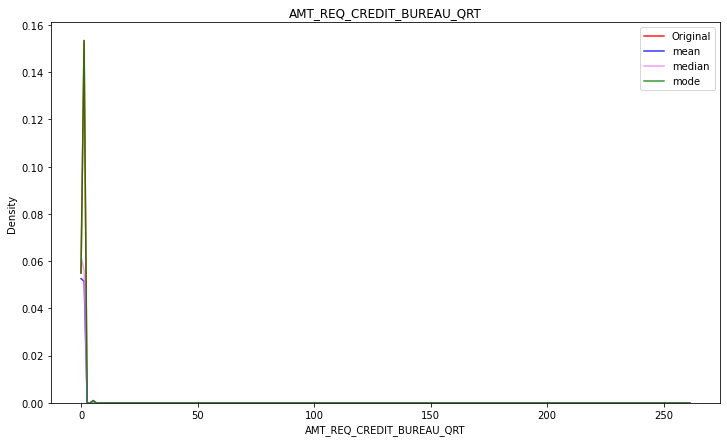

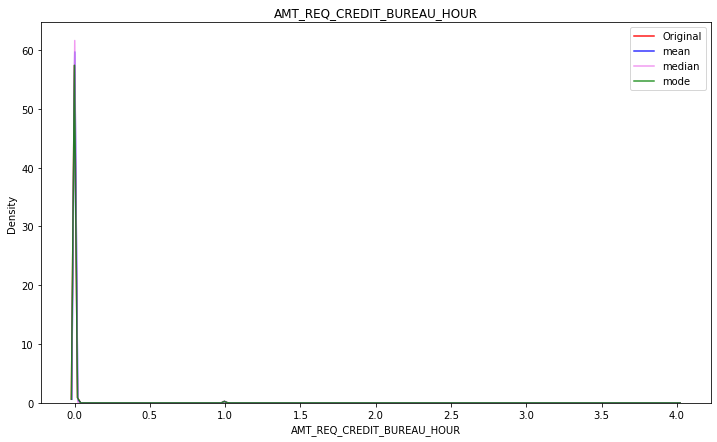

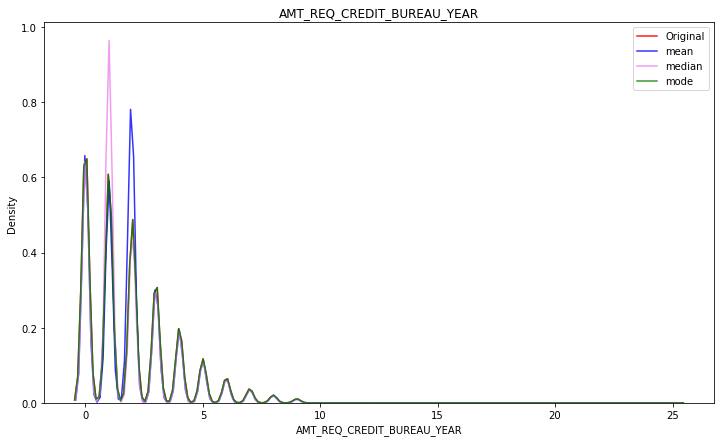

In [30]:
for feature in num_missing_df.index:
    dist_plot(appli_data[feature],feature)

* If we look at the distribution plots for all the rest missing data columns. 
* The mode doesn't disturb the data distrubution. 
* where else replacing the values with mean and median results in disturbance in the data. so we will `replace the missing  values with mode`

In [31]:
# replacing the rest missing value with the mode
appli_data[num_missing_df.index]=appli_data[num_missing_df.index].fillna(appli_data[num_missing_df.index].mean())

# Catagorical Datatype Columns

### Catagorical Datatype Columns

In [32]:
catagorical_columns=[feature for feature in appli_data.columns if appli_data[feature].dtype=='O']

In [33]:
appli_data[catagorical_columns].head(3)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN


## Handling Catagorical Missing Values

In [34]:
# stored the columns of missing values as per their dtypes so it can be used in handling the data easily
cat_missing=missing_data[missing_data.index.isin(catagorical_columns)].index

In [35]:
cat_missing_df=appli_data[cat_missing].isna().aggregate(['mean','sum']).T
cat_missing_df['mean']=cat_missing_df['mean']*100
cat_missing_df

,mean,sum
FONDKAPREMONT_MODE,68.386172,210295.0
WALLSMATERIAL_MODE,50.840783,156341.0
HOUSETYPE_MODE,50.176091,154297.0
EMERGENCYSTATE_MODE,47.398304,145755.0
OCCUPATION_TYPE,31.345545,96391.0
NAME_TYPE_SUITE,0.420148,1292.0


* we will drop the values with missing value percentage >50 ie, `FONDKAPREMONT_MODE,WALLSMATERIAL_MODE,HOUSETYPE_MODE`
* we will replace the `NAME_TYPE_SUITE` with mode as the missing value percentage is very low

In [36]:
appli_data.drop(["FONDKAPREMONT_MODE","WALLSMATERIAL_MODE","HOUSETYPE_MODE"],axis=1,inplace=True)

In [37]:
appli_data["NAME_TYPE_SUITE"].fillna(appli_data["NAME_TYPE_SUITE"].mode,inplace=True)

In [38]:
appli_data["OCCUPATION_TYPE"].describe()

count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object

<AxesSubplot:>

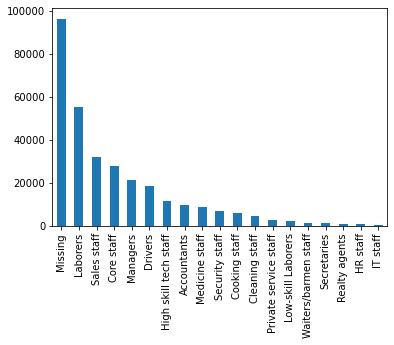

In [39]:
appli_data["OCCUPATION_TYPE"].fillna("Missing").value_counts().plot.bar()

* There is Significantly High number of Missing Values we will take Missing Values as a Featue and replace Missing Values as 'Missing' text

In [40]:
appli_data["OCCUPATION_TYPE"].fillna("Missing",inplace=True)

## Handling Outliers

In [41]:
numerical_columns=[feature for feature in appli_data.columns if ((feature not in bool_columns ) and appli_data[feature].dtype in [int,float])]

In [42]:
appli_data[numerical_columns].describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,2.152665,2.052463,2.031521,12.063419,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.722121,2.371231e+05,4.024908e+05,14493.454517,3.692794e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.910679,0.509034,0.502737,3.265832,1.908550e-01,0.174464,2.397000,0.445956,2.375849,0.361689,826.807143,0.077983,0.103009,0.190366,0.851923,0.738507,1.738528
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,10.000000,3.929737e-01,0.417100,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,12.000000,5.654672e-01,0.510853,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.899974
75%,367142.500000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,14.000000,6.634218e-01,0.636376,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,0.267395,0.265474,3.000000
max,456255.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,20.000000,3.000000,3.000000,23.000000,8.549997e-01,0.896010,348.000000,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<AxesSubplot:>

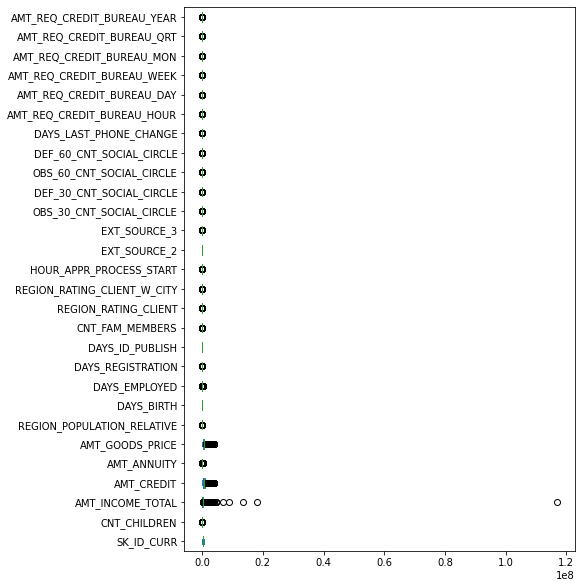

In [43]:
appli_data[numerical_columns].plot.box(figsize=(7,10),vert=False)

* We can also see `EXT_SOURCE_2,DAYS_BIRTH, SK_ID_CURR,DAYS_ID_PUBLISHED` has no outliers
* Looking at the box plot we can easiy say `AMT_INCOME_TOTAL` has an outlier. Lets plot a seperate box plot for it.

<AxesSubplot:>

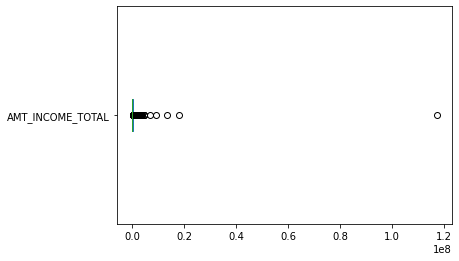

In [44]:
# box plot for AMT_INCOME_TOTAL
appli_data["AMT_INCOME_TOTAL"].plot.box(vert=False)

<AxesSubplot:>

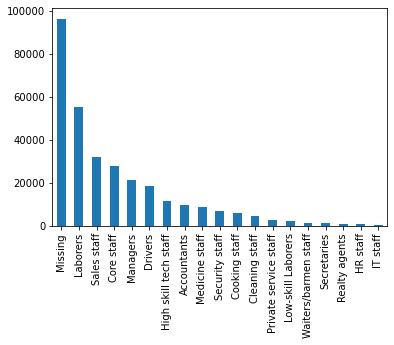

In [45]:
appli_data["OCCUPATION_TYPE"].value_counts().plot.bar()

In [46]:
print("99th quantile of AMT_INCOME_TOTAL =",appli_data.AMT_INCOME_TOTAL.quantile(0.90))
print("100th quantile of AMT_INCOME_TOTAL =",appli_data.AMT_INCOME_TOTAL.quantile(1))

99th quantile of AMT_INCOME_TOTAL = 270000.0
100th quantile of AMT_INCOME_TOTAL = 117000000.0


In [47]:
appli_data[appli_data.AMT_INCOME_TOTAL==117000000.0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.113161,0.145543,No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


* There is Lot of Difference Between the 99th quantile and the 100 th  quantile. Even though There are Majority of Labours the 100 th quantile is one labor worker with very high salary compared to all the rest of others salary. 
* By dropping this `EXT_SOURCE_2,DAYS_BIRTH, SK_ID_CURR,AMT_INCOME_TOTAL,DAYS_ID_PUBLISH` lets analyze rest


<AxesSubplot:>

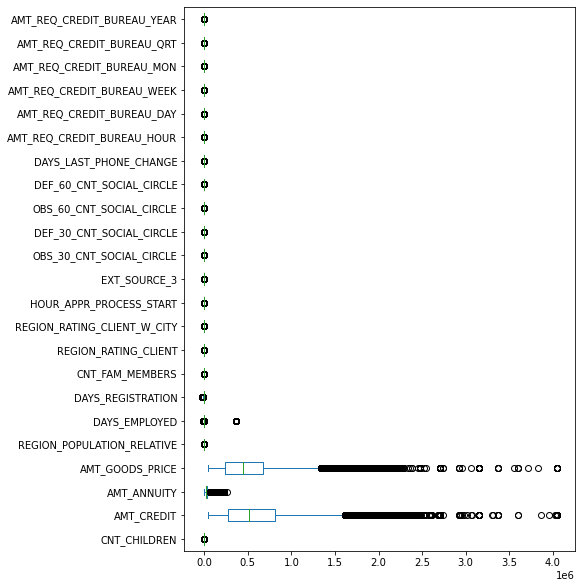

In [48]:
appli_data[numerical_columns].drop(["EXT_SOURCE_2",
                                    "DAYS_BIRTH", 
                                    "SK_ID_CURR",
                                    "AMT_INCOME_TOTAL",
                                   "DAYS_ID_PUBLISH"],axis=1).plot.box(figsize=(7,10),vert=False)

<AxesSubplot:>

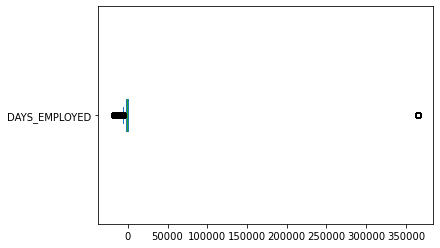

In [49]:
appli_data["DAYS_EMPLOYED"].plot.box(vert=False)

In [50]:
print("99th quantile of DAYS_EMPLOYED =",appli_data.DAYS_EMPLOYED.quantile(0.80))
print("100th quantile of DAYS_EMPLOYED =",appli_data.DAYS_EMPLOYED.quantile(1))

99th quantile of DAYS_EMPLOYED = -144.0
100th quantile of DAYS_EMPLOYED = 365243.0


* along with previous colums Dropping the `DAYS_EMPLOYED,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE` columsns

<AxesSubplot:xlabel='DAYS_EMPLOYED', ylabel='Density'>

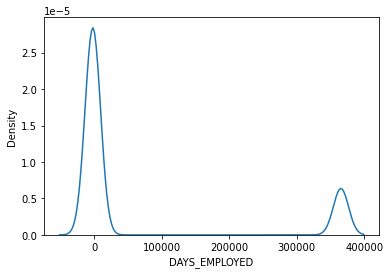

In [51]:
sns.kdeplot(appli_data["DAYS_EMPLOYED"])

* looking at the Data Number of Days `DAYS_BIRTH,DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH` cant be Negative an a person cannot work >30 years(10950) days on a max average and cannot work for -ve number of days

* Looks like the data is corroupted or the invalied data is entered.


<AxesSubplot:>

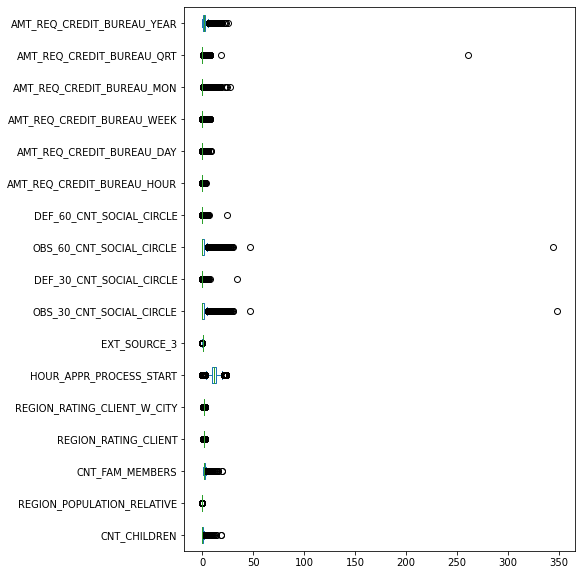

In [52]:
appli_data[numerical_columns].drop(["EXT_SOURCE_2",
                                    "DAYS_BIRTH",
                                    "SK_ID_CURR",
                                    "AMT_INCOME_TOTAL",
                                   "DAYS_ID_PUBLISH",
                                   "DAYS_EMPLOYED",
                                    "AMT_CREDIT",
                                    "AMT_ANNUITY",
                                    "AMT_GOODS_PRICE",
                                   "DAYS_REGISTRATION",
                                   "DAYS_LAST_PHONE_CHANGE"],axis=1).plot.box(figsize=(7,10),vert=False)

In [53]:
appli_data[(appli_data["DAYS_EMPLOYED"]>0) & (appli_data["DAYS_EMPLOYED"]<300000)]["DAYS_EMPLOYED"]

Series([], Name: DAYS_EMPLOYED, dtype: int64)

* Looking at the data we can say `DEF_60_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_30_CNT_SOCIAL_CIRCLE,` columns outliers are not outlies as it might be the infomation of the Deafaulters social sorrounding infomation. most of the data has non defaulters so the data is imbalance so the few defaulters infomation that to with social surrounding information is being reflicting as outliers. so those are `not outliers`
<br/><br/>
* `CNT_CHILDREN, CNT_FAM_MEMBERS, HOUR_APPR_PROCESS_START` Lets analyze it individually
<br/><br/>
* we need to have a look at `REGION_POPULATION_RELATIVE` as it is not clear in the above diagram
<br/><br/>
* `REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY` looking at data description the outliers are not crossed the rating level. the rating cannont be considerd as outlier because the only area with huge number of defaulters get low rating and defaulters are low in number so data is imbalanced. Hence it cannot be considerd as outliers

* Apart from `DAYS_EMPLOYED` Nothing seems to have outliers. even there are few points outside of the iQR they seems legitimate as they are closly packed and nearer to the IQR.
* Lets have a look at `DAYS_EMPLOYED`

<AxesSubplot:>

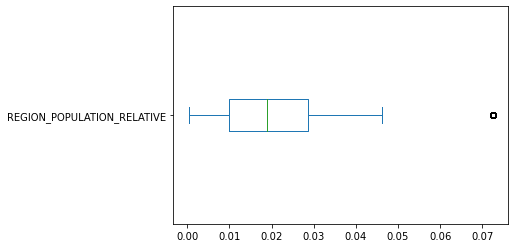

In [54]:
appli_data["REGION_POPULATION_RELATIVE"].plot.box(vert=False)

In [55]:
print("97th quantile of REGION_POPULATION_RELATIVE =",appli_data.REGION_POPULATION_RELATIVE.quantile(0.97))
print("100th quantile of REGION_POPULATION_RELATIVE =",appli_data.REGION_POPULATION_RELATIVE.quantile(1))

97th quantile of REGION_POPULATION_RELATIVE = 0.04622
100th quantile of REGION_POPULATION_RELATIVE = 0.072508


<AxesSubplot:>

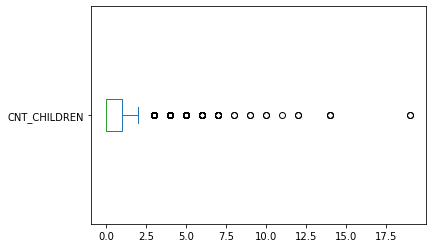

In [56]:
appli_data["CNT_CHILDREN"].plot.box(vert=False)

<AxesSubplot:>

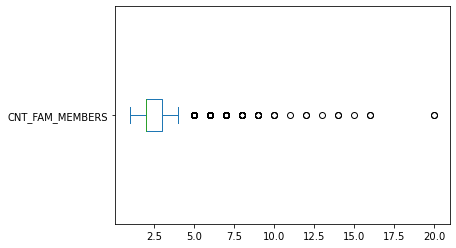

In [57]:
appli_data["CNT_FAM_MEMBERS"].plot.box(vert=False)

In [58]:
appli_data["CNT_FAM_MEMBERS"].unique()

array([ 1.        ,  2.        ,  3.        ,  4.        ,  5.        ,
        6.        ,  9.        ,  7.        ,  8.        , 10.        ,
       13.        ,  2.15266545, 14.        , 12.        , 20.        ,
       15.        , 16.        , 11.        ])

In [59]:
appli_data["CNT_FAM_MEMBERS"]=appli_data["CNT_FAM_MEMBERS"].astype(int)

In [60]:
appli_data["CNT_FAM_MEMBERS"].unique()

array([ 1,  2,  3,  4,  5,  6,  9,  7,  8, 10, 13, 14, 12, 20, 15, 16, 11])

<AxesSubplot:>

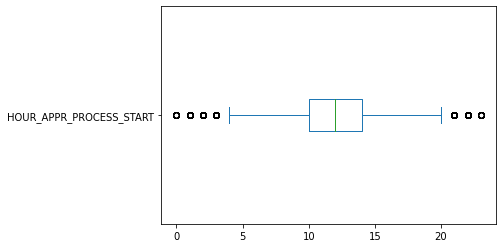

In [61]:
appli_data["HOUR_APPR_PROCESS_START"].plot.box(vert=False)

* This Seems to have Outliers. Childeren >3 per family is much rare, and most of the familes are nucliear so mostly people with >5 members per family are rare case. So `CNT_CHILDREN,CNT_FAM_MEMBERS` has outliers
<br/><br/>
* `HOUR_APPR_PROCESS_START` has no outliers

* we cant consider this as outlier as the it is closer to the data. and it indicates the normalized population so it is `not an outlier`
<br/><br/>
* So In our Outlier analysis we found `DAYS_EMPLOYED` data is invalied So we will drop ip .
<br/><br/>
* we also found`AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS` column has outliers

In [62]:
appli_data.drop("DAYS_EMPLOYED",axis=1,inplace=True)

## Data Imbalance Check

[]

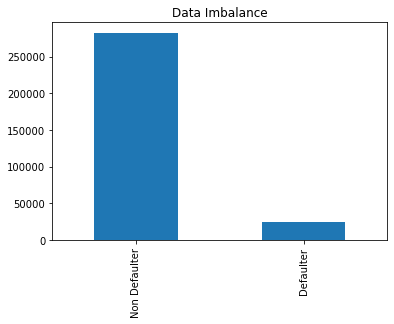

In [63]:
plt.title("Data Imbalance")
fig=appli_data["TARGET"].value_counts().plot.bar()
fig.set_xticklabels(['Non Defaulter','Defaulter'])
plt.plot()

In [64]:
appli_data["TARGET"].value_counts()/len(appli_data["TARGET"]) *100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

* The Data Has **`91.93 %`**` Non Defaulters` and **`8.07 %`**` Loan Defaulters`

# Correlation wrt Target Variable of Boolean columns

In [65]:
corr_target=appli_data[bool_columns].corrwith(appli_data.TARGET)

In [66]:
corr_target.abs().sort_values(ascending=False)

TARGET                         1.000000
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
LIVE_CITY_NOT_WORK_CITY        0.032518
FLAG_DOCUMENT_6                0.028602
FLAG_WORK_PHONE                0.028524
FLAG_PHONE                     0.023806
FLAG_DOCUMENT_16               0.011615
FLAG_DOCUMENT_13               0.011583
FLAG_DOCUMENT_14               0.009464
FLAG_DOCUMENT_8                0.008040
FLAG_DOCUMENT_18               0.007952
REG_REGION_NOT_WORK_REGION     0.006942
FLAG_DOCUMENT_15               0.006536
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_9                0.004352
FLAG_DOCUMENT_11               0.004229
FLAG_DOCUMENT_21               0.003709
FLAG_DOCUMENT_17               0.003378
LIVE_REGION_NOT_WORK_REGION    0.002819
FLAG_DOCUMENT_4                0.002672
FLAG_EMAIL                     0.001758


* Looking at the Correalation wrt bool_columns we can come to an conclusion that these bool variables have low impact on the loan defaulters

## Univarient Analysis

In [67]:
appli_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-4260.0,-2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


* Lets see weather the loan defaulters take Cash Loans or Revolving Loans

In [68]:
sns.set_style("whitegrid")

[]

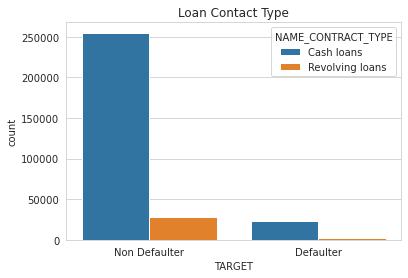

In [69]:

plt.title("Loan Contact Type")
fig=sns.countplot("TARGET",hue="NAME_CONTRACT_TYPE",data=appli_data)
fig.set_xticklabels(['Non Defaulter','Defaulter'])
plt.plot()

* The People Usually Take More Cash Loans Alogn with them The Loan Defaults also take more Cash Loans

[]

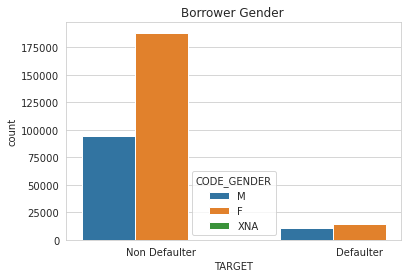

In [70]:
plt.title("Borrower Gender ")
fig=sns.countplot("TARGET",hue="CODE_GENDER",data=appli_data)
fig.set_xticklabels(['Non Defaulter','Defaulter'])
plt.plot()

In [71]:
appli_data.CODE_GENDER.mode()

0    F
Name: CODE_GENDER, dtype: object

In [72]:
# we will replace the Value of XNA with mode value F
appli_data.CODE_GENDER.replace(to_replace='XNA',value='F',inplace=True)

[]

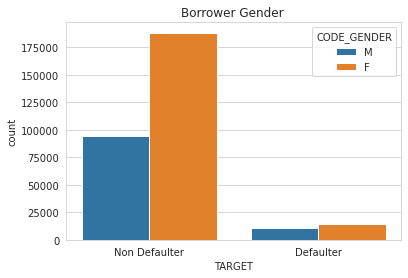

In [73]:
plt.title("Borrower Gender ")
fig=sns.countplot("TARGET",hue="CODE_GENDER",data=appli_data)
fig.set_xticklabels(['Non Defaulter','Defaulter'])
plt.plot()

[]

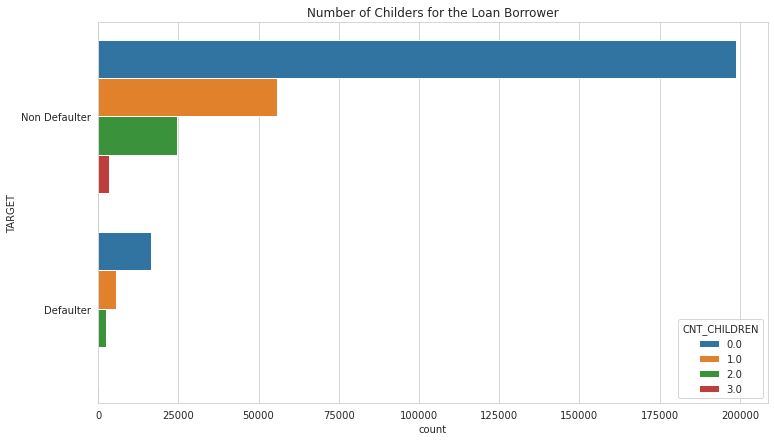

In [74]:
plt.figure(figsize=(12,7))
plt.title("Number of Childers for the Loan Borrower")
fig=sns.countplot(y="TARGET",hue="CNT_CHILDREN",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

[]

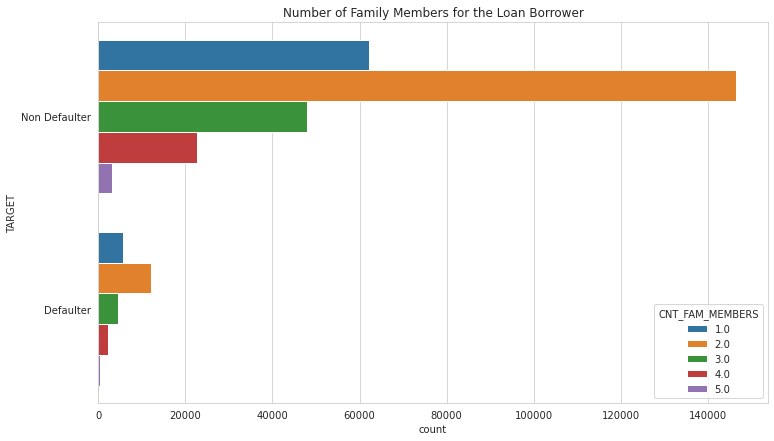

In [75]:
plt.figure(figsize=(12,7))
plt.title("Number of Family Members for the Loan Borrower")
fig=sns.countplot(y="TARGET",hue="CNT_FAM_MEMBERS",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

[]

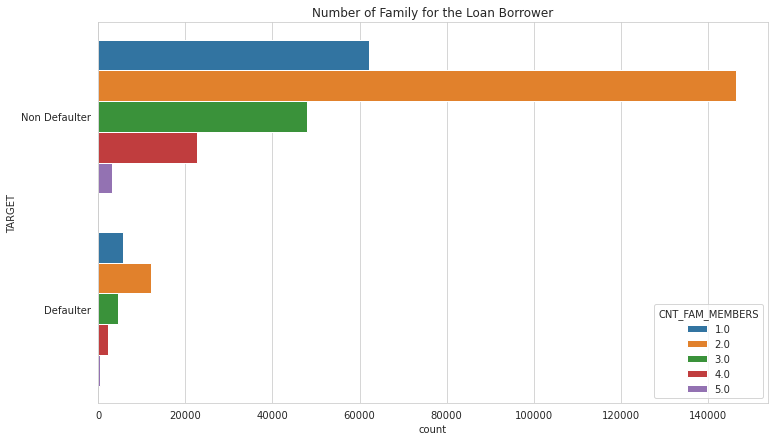

In [76]:
plt.figure(figsize=(12,7))
plt.title("Number of Family for the Loan Borrower")
fig=sns.countplot(y="TARGET",hue="CNT_FAM_MEMBERS",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

[]

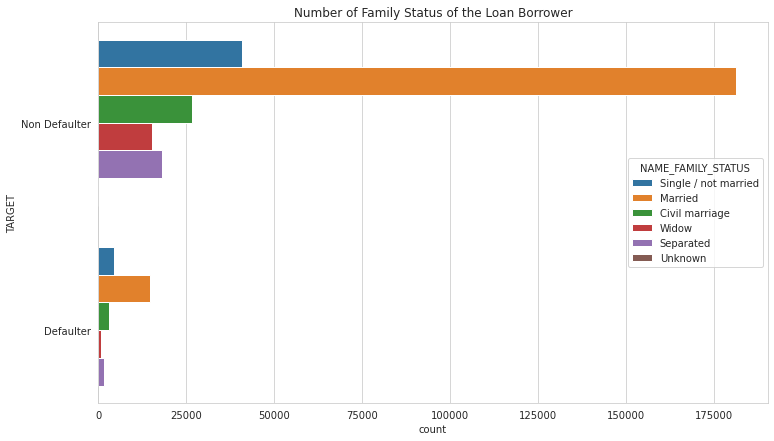

In [77]:
plt.figure(figsize=(12,7))
plt.title("Number of Family Status of the Loan Borrower")
fig=sns.countplot(y="TARGET",hue="NAME_FAMILY_STATUS",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

[]

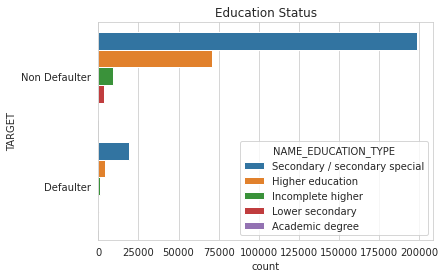

In [78]:
plt.title("Education Status")
fig=sns.countplot(y="TARGET",hue="NAME_EDUCATION_TYPE",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

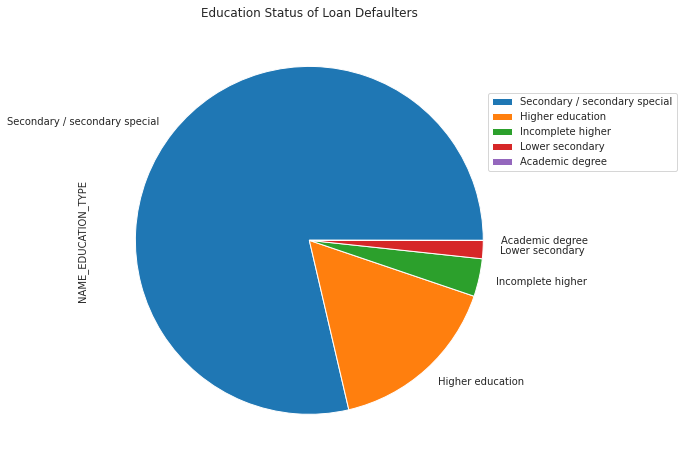

In [79]:
plt.figure(figsize=(10,8))
plt.title("Education Status of Loan Defaulters")
appli_data.where(appli_data.TARGET==1).NAME_EDUCATION_TYPE.value_counts().plot.pie()
plt.legend(bbox_to_anchor =(0.9, 0.85))

[]

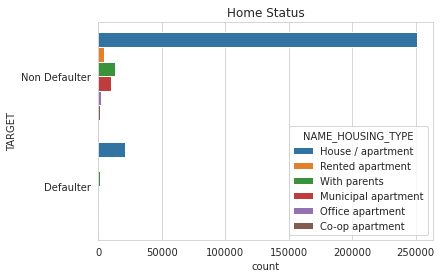

In [80]:
plt.title("Home Status")
fig=sns.countplot(y="TARGET",hue="NAME_HOUSING_TYPE",data=appli_data.where(appli_data.CNT_CHILDREN<4))
fig.set_yticklabels(['Non Defaulter','Defaulter'])
plt.plot()

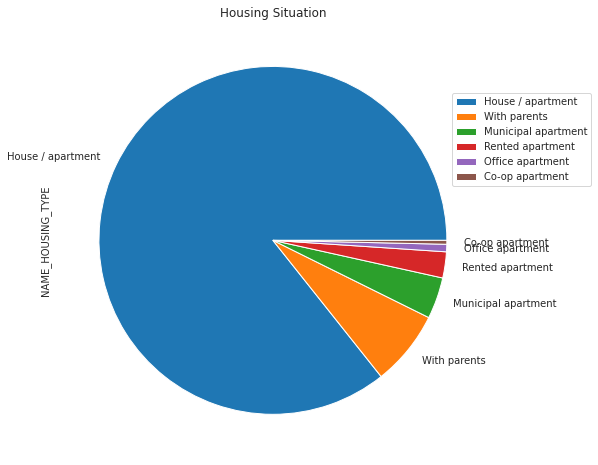

In [81]:
plt.figure(figsize=(10,8))
plt.title("Housing Situation")
appli_data.where(appli_data.TARGET==1).NAME_HOUSING_TYPE.value_counts().plot.pie()
plt.legend(bbox_to_anchor =(0.9, 0.85))

<AxesSubplot:xlabel='count', ylabel='TARGET'>

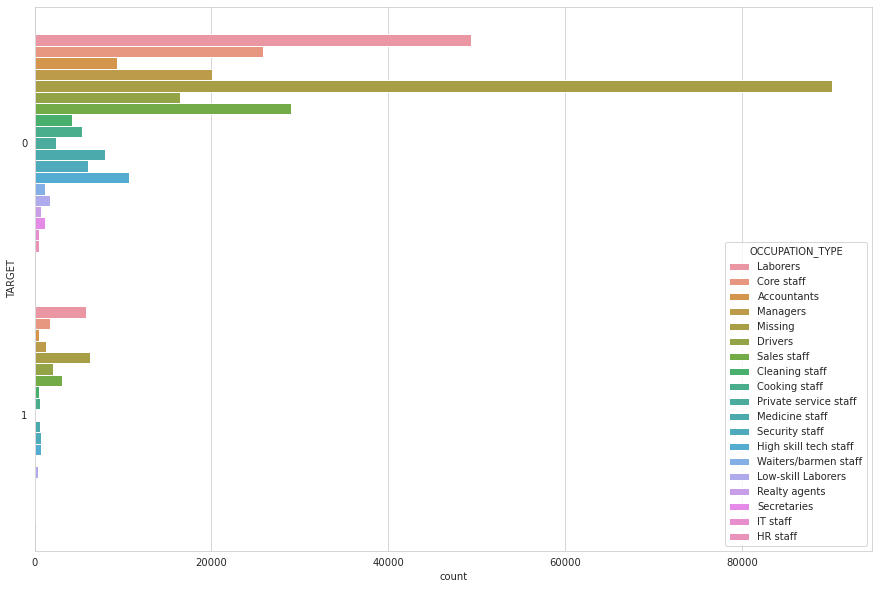

In [82]:
plt.figure(figsize=(15,10))
sns.countplot(y="TARGET",hue="OCCUPATION_TYPE",data=appli_data)

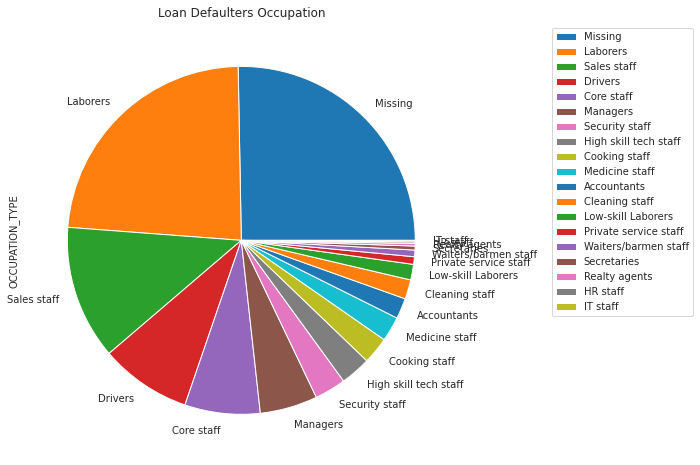

In [83]:
plt.figure(figsize=(10,8))
plt.title("Loan Defaulters Occupation")
appli_data.where(appli_data.TARGET==1).OCCUPATION_TYPE.value_counts().plot.pie()
plt.legend(bbox_to_anchor =(1.55, 1))

<AxesSubplot:xlabel='count', ylabel='TARGET'>

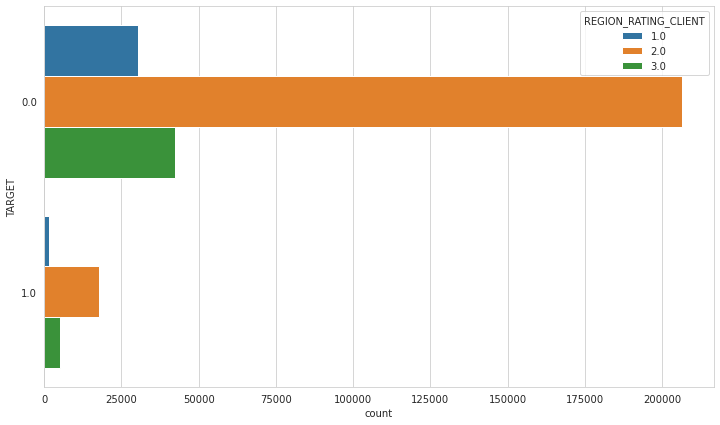

In [84]:
plt.figure(figsize=(12,7))
sns.countplot(y="TARGET",hue="REGION_RATING_CLIENT",data=appli_data.where(appli_data.CNT_FAM_MEMBERS<5))

<AxesSubplot:xlabel='count', ylabel='TARGET'>

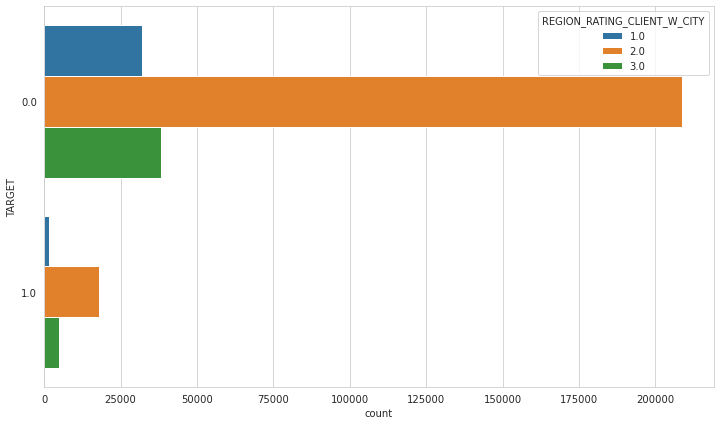

In [85]:
plt.figure(figsize=(12,7))
sns.countplot(y="TARGET",hue="REGION_RATING_CLIENT_W_CITY",data=appli_data.where(appli_data.CNT_FAM_MEMBERS<5))

<AxesSubplot:xlabel='count', ylabel='TARGET'>

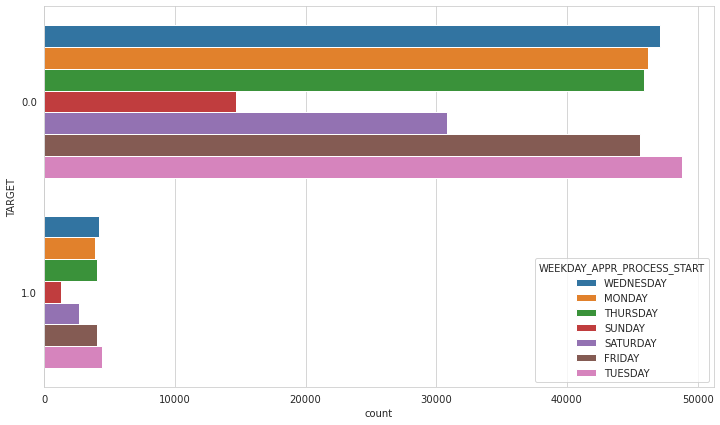

In [86]:
plt.figure(figsize=(12,7))
sns.countplot(y="TARGET",hue="WEEKDAY_APPR_PROCESS_START",data=appli_data.where(appli_data.CNT_FAM_MEMBERS<5))

<AxesSubplot:xlabel='count', ylabel='TARGET'>

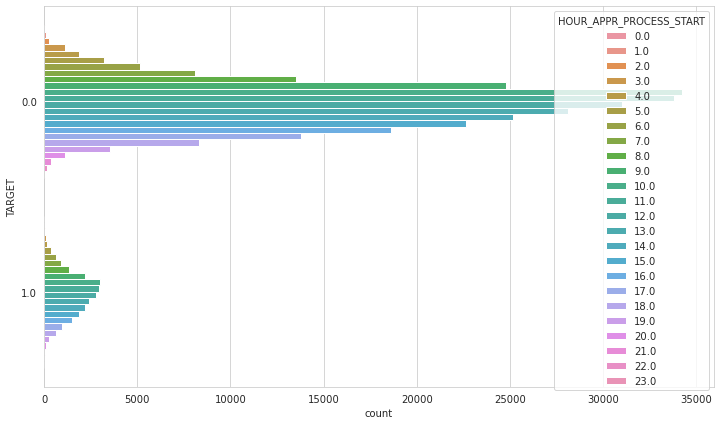

In [87]:
plt.figure(figsize=(12,7))
sns.countplot(y="TARGET",hue="HOUR_APPR_PROCESS_START",data=appli_data.where(appli_data.CNT_FAM_MEMBERS<5))

* By Observig The Both univairant bar graphs we can come to a conclusiton that `Married Couple(family of 2 people asuming as married couple) with No Childeren are high loan defaulters`

[]

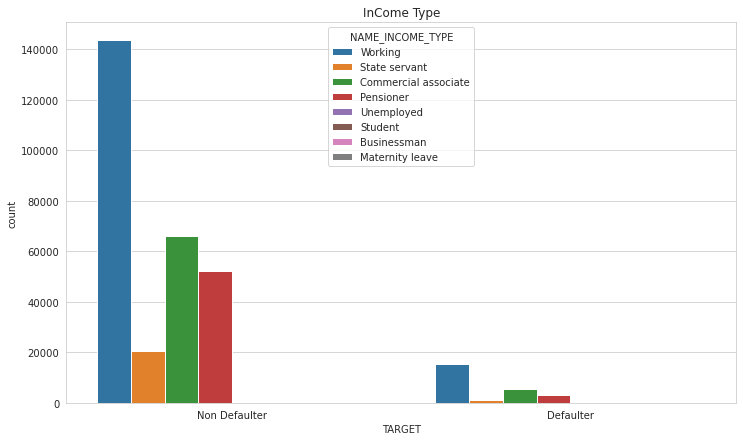

In [88]:
plt.figure(figsize=(12,7))
plt.title("InCome Type")
fig=sns.countplot("TARGET",hue="NAME_INCOME_TYPE",data=appli_data)
fig.set_xticklabels(['Non Defaulter','Defaulter'])
plt.plot()

*

<AxesSubplot:xlabel='count', ylabel='TARGET'>

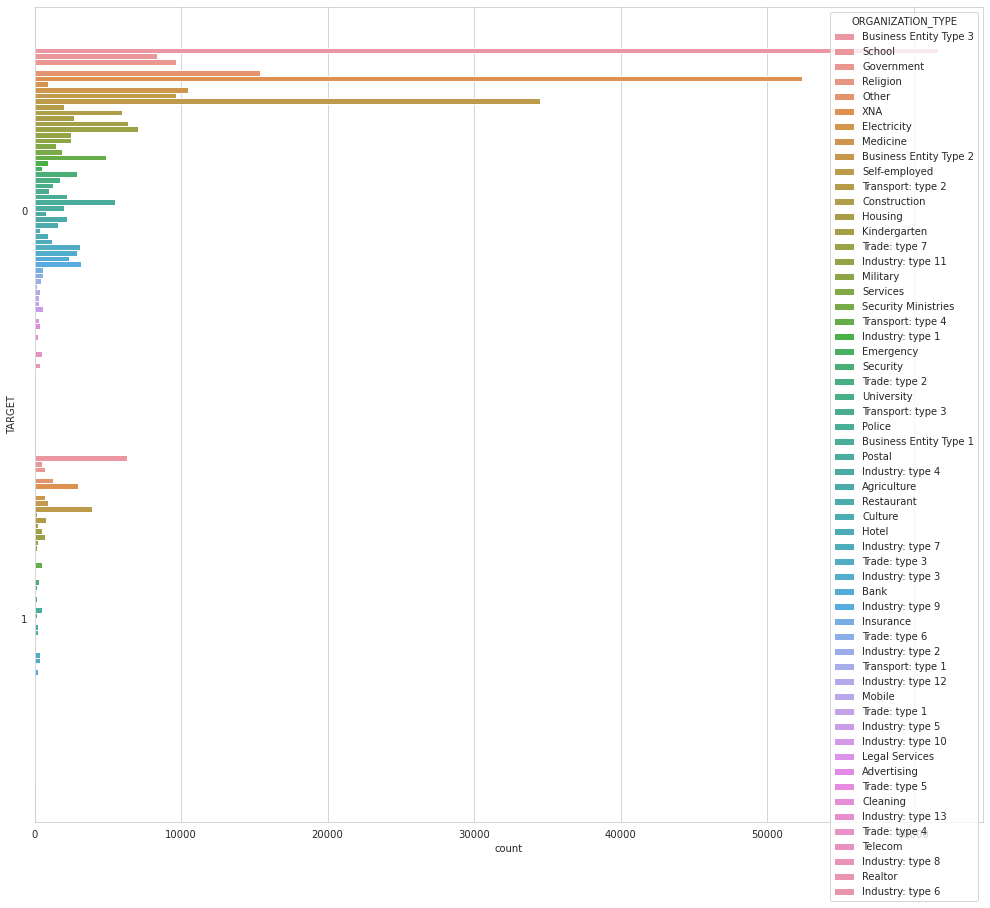

In [89]:
sns.set_style("whitegrid")
plt.figure(figsize=(17,15))
sns.countplot(y="TARGET",hue="ORGANIZATION_TYPE",data=appli_data)

* Most of the working Poorfesionals take more loans and in the loan defaulters they are the  majority loan defaulters

# Bi Varient Analysis

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

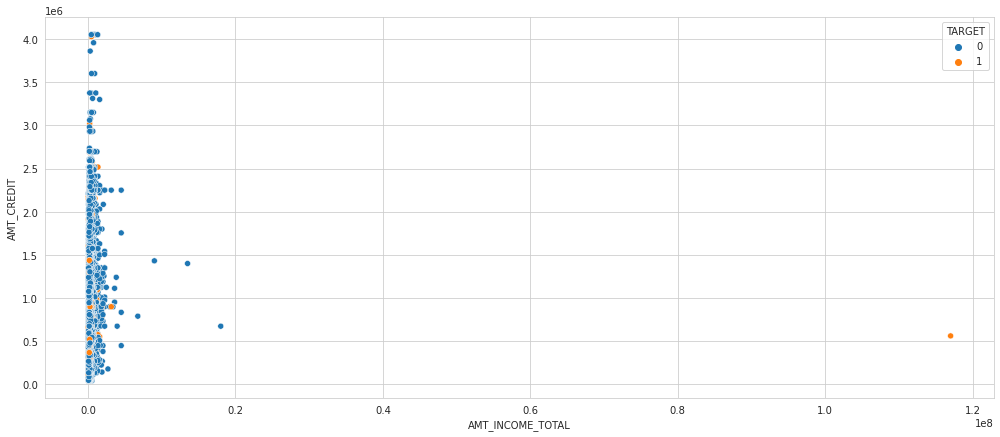

In [90]:
plt.figure(figsize=(17,7))
sns.scatterplot(data=appli_data,x="AMT_INCOME_TOTAL",y="AMT_CREDIT",hue="TARGET")

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

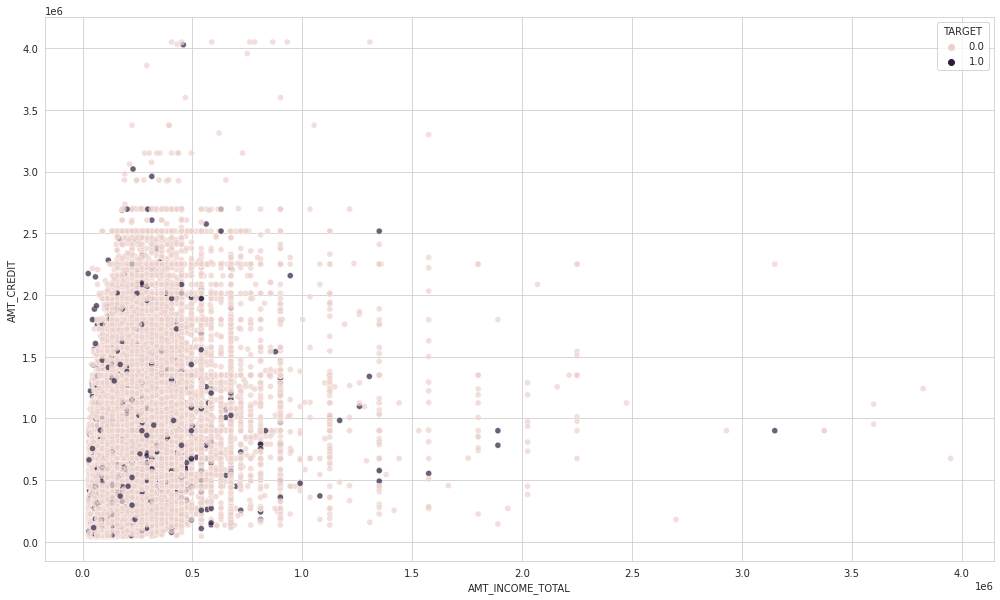

In [91]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=appli_data.where(appli_data.AMT_INCOME_TOTAL<4000000),x="AMT_INCOME_TOTAL",y="AMT_CREDIT",hue="TARGET",alpha=0.7)

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='CNT_FAM_MEMBERS'>

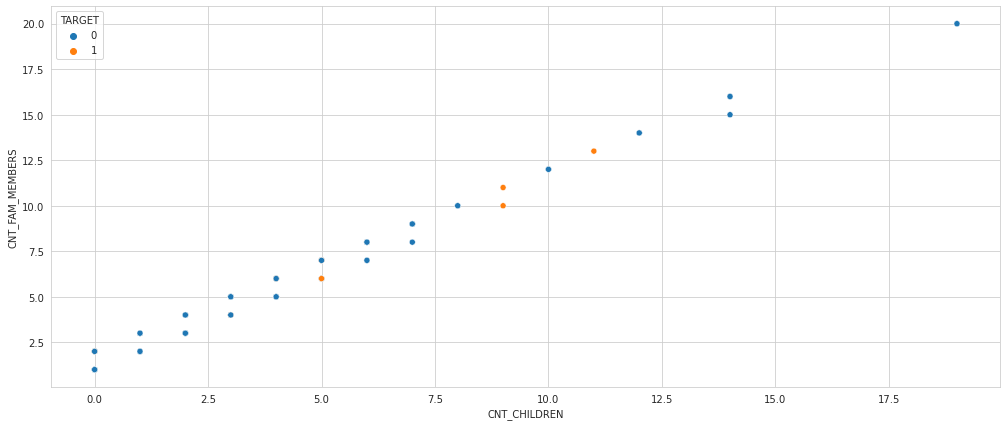

In [92]:
plt.figure(figsize=(17,7))
sns.scatterplot(data=appli_data,x="CNT_CHILDREN",y="CNT_FAM_MEMBERS",hue="TARGET")

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='AMT_CREDIT'>

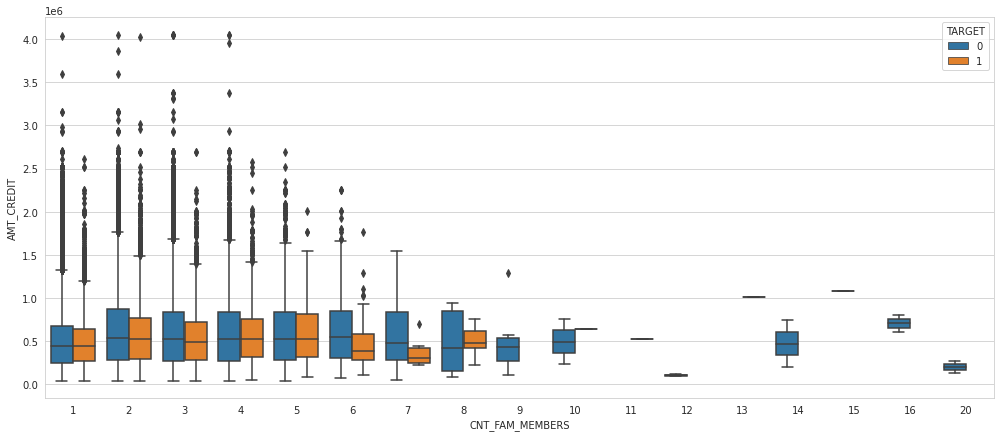

In [93]:
plt.figure(figsize=(17,7))
sns.boxplot(data=appli_data,x="CNT_FAM_MEMBERS",y="AMT_CREDIT",hue="TARGET")

* We ignore family member >5 because people with family members >5 are very rare and they are outliers

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='AMT_CREDIT'>

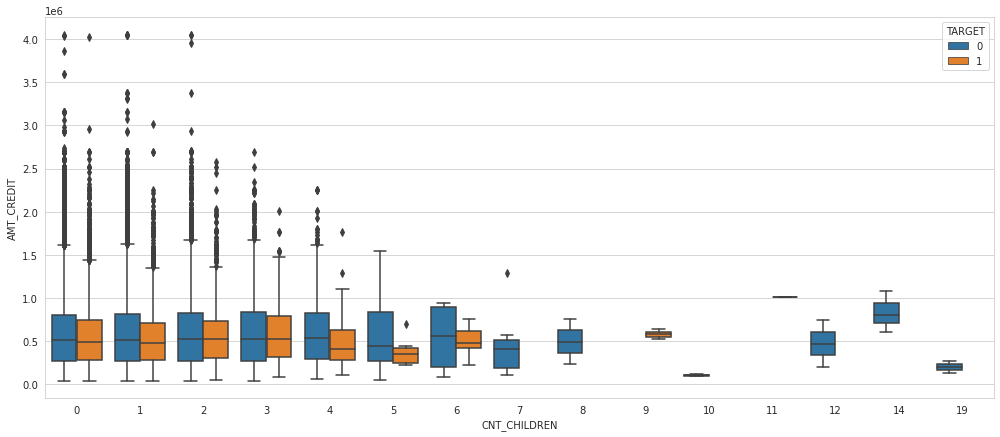

In [94]:
plt.figure(figsize=(17,7))
sns.boxplot(data=appli_data,x="CNT_CHILDREN",y="AMT_CREDIT",hue="TARGET")


* We ignore children >3 because people with children >3 are very rare and they are outliers

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='AMT_CREDIT'>

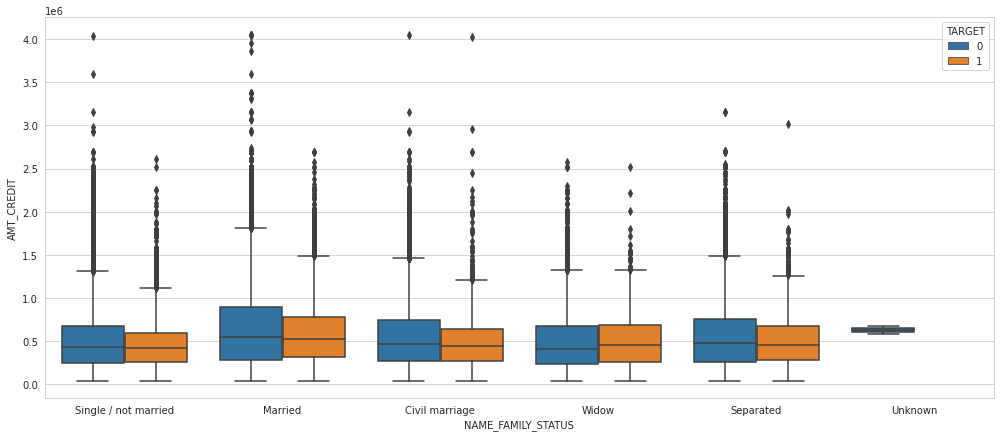

In [95]:
plt.figure(figsize=(17,7))
sns.boxplot(data=appli_data,x="NAME_FAMILY_STATUS",y="AMT_CREDIT",hue="TARGET")


<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='AMT_CREDIT'>

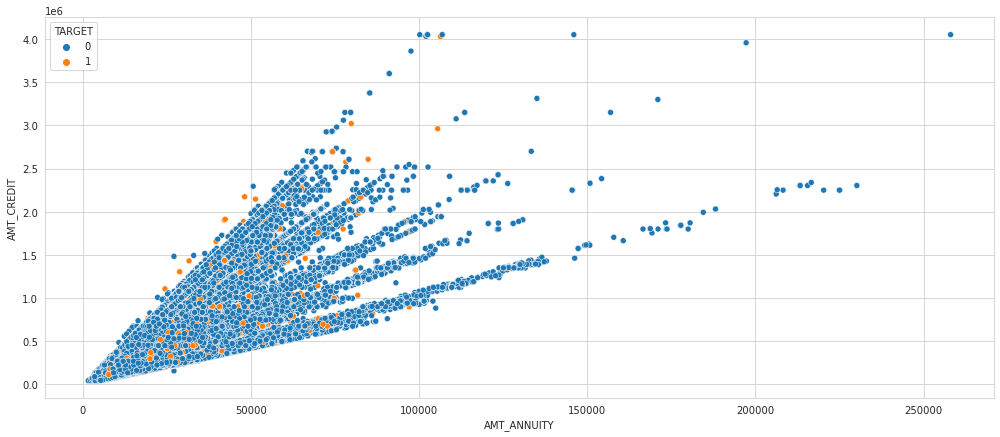

In [96]:
plt.figure(figsize=(17,7))
sns.scatterplot(data=appli_data,x="AMT_ANNUITY",y="AMT_CREDIT",hue="TARGET")

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

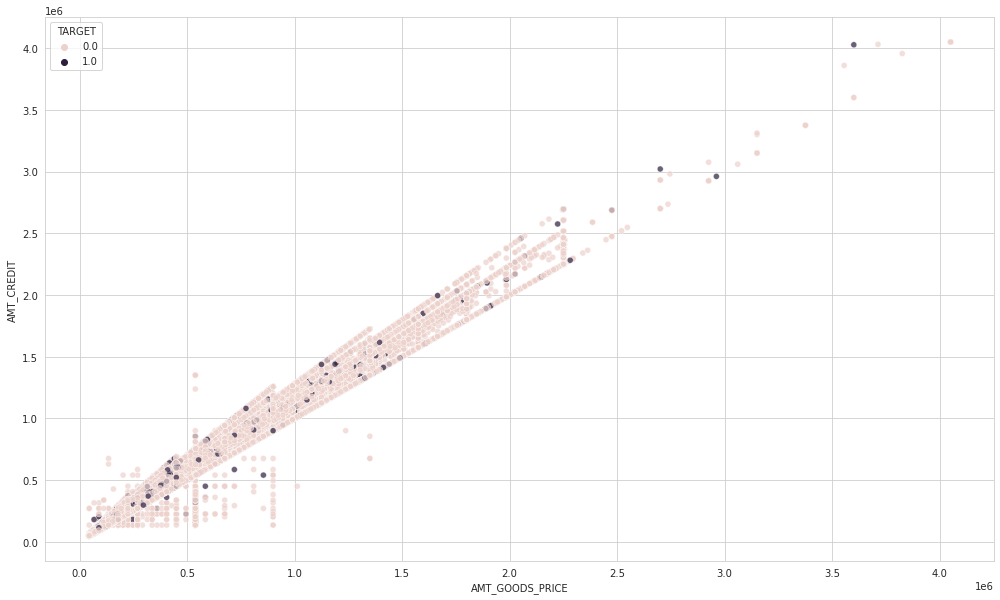

In [97]:
plt.figure(figsize=(17,10))
sns.scatterplot(data=appli_data.where(appli_data.AMT_INCOME_TOTAL<4000000),x="AMT_GOODS_PRICE",y="AMT_CREDIT",hue="TARGET",alpha=0.7)

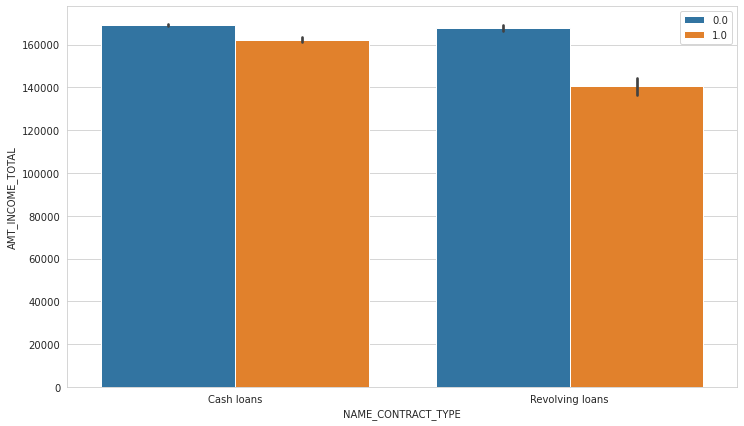

In [98]:
plt.figure(figsize=(12,7))
dta=appli_data.where(appli_data.AMT_INCOME_TOTAL<4000000)
sns.barplot(data=dta,hue="TARGET",x="NAME_CONTRACT_TYPE",y="AMT_INCOME_TOTAL",)
plt.legend()

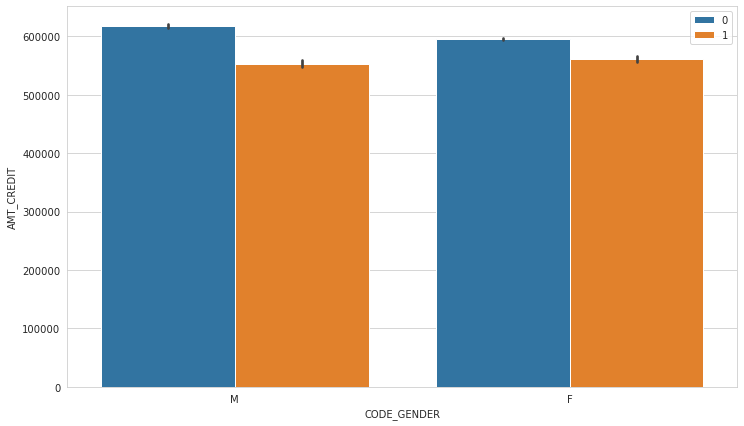

In [99]:
plt.figure(figsize=(12,7))
sns.barplot(data=appli_data,hue="TARGET",x="CODE_GENDER",y="AMT_CREDIT",)
plt.legend()

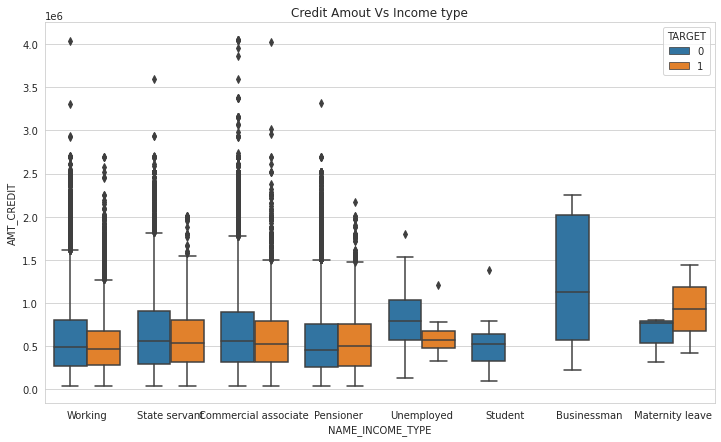

In [100]:
plt.figure(figsize=(12,7))
plt.title("Credit Amout Vs Income type")
sns.boxplot(data=appli_data,hue="TARGET",x="NAME_INCOME_TYPE",y="AMT_CREDIT",)
plt.show()

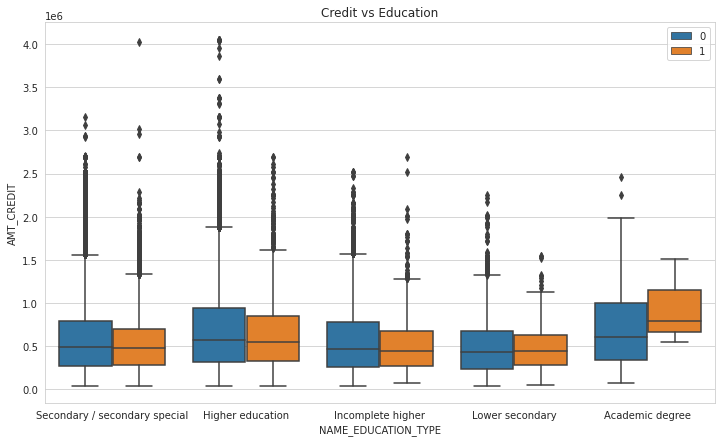

In [101]:
plt.figure(figsize=(12,7))
plt.title("Credit vs Education")
sns.boxplot(data=appli_data,hue="TARGET",x="NAME_EDUCATION_TYPE",y="AMT_CREDIT",)
plt.legend()

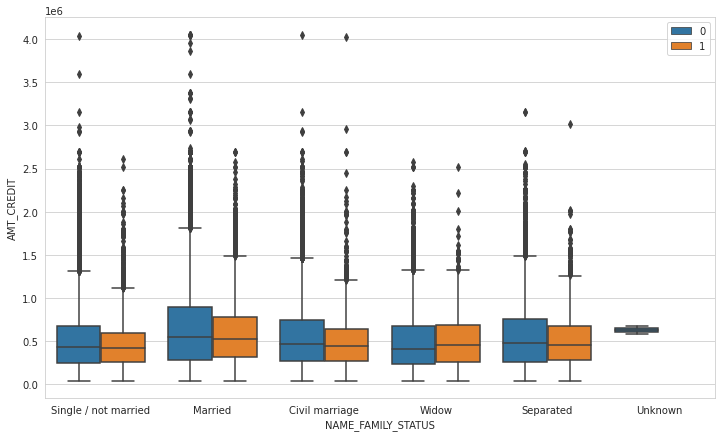

In [102]:
plt.figure(figsize=(12,7))
sns.boxplot(data=appli_data,hue="TARGET",x="NAME_FAMILY_STATUS",y="AMT_CREDIT",)
plt.legend()

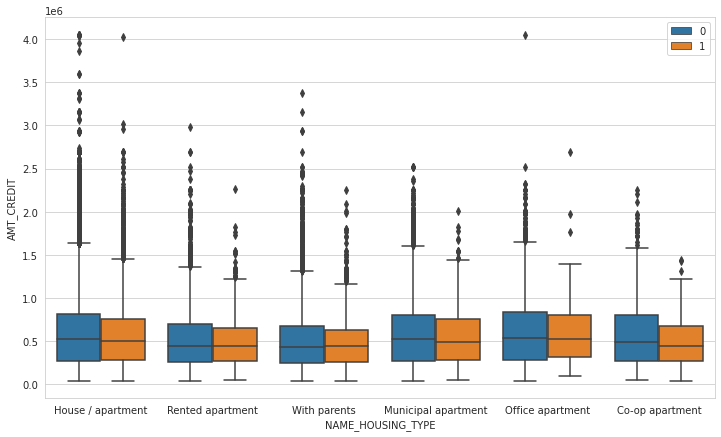

In [103]:
plt.figure(figsize=(12,7))
sns.boxplot(data=appli_data,hue="TARGET",x="NAME_HOUSING_TYPE",y="AMT_CREDIT",)
plt.legend()

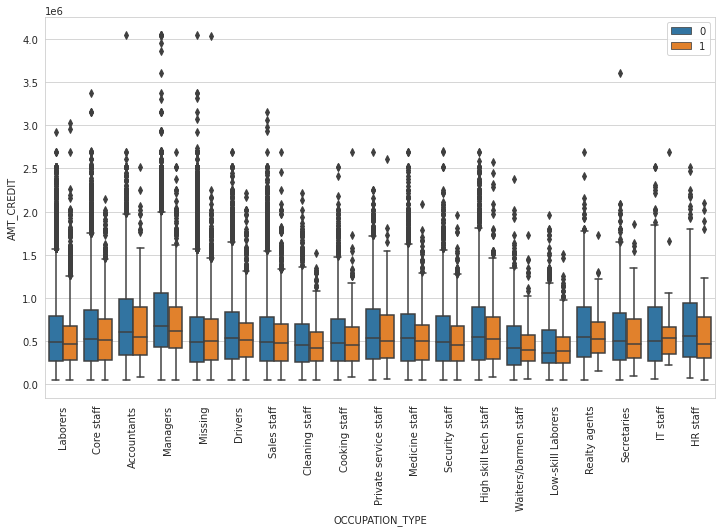

In [104]:
plt.figure(figsize=(12,7))
sns.boxplot(data=appli_data,hue="TARGET",x="OCCUPATION_TYPE",y="AMT_CREDIT",)
plt.xticks(rotation=90)
plt.legend()

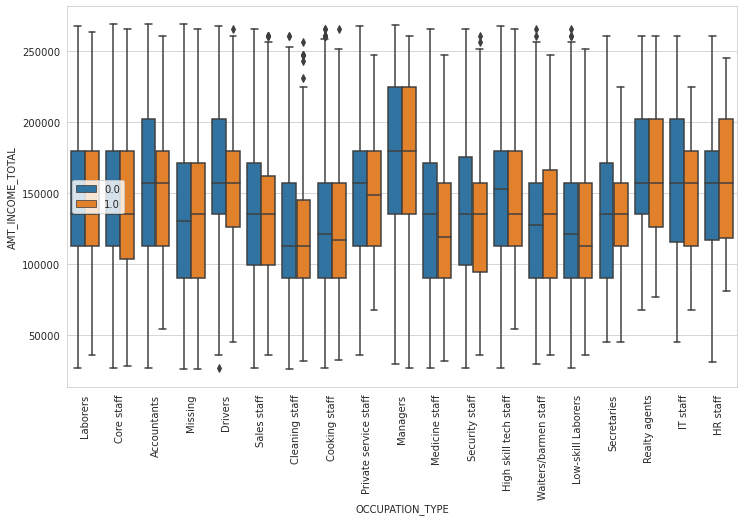

In [105]:
plt.figure(figsize=(12,7))
dta=appli_data.where(appli_data.AMT_INCOME_TOTAL<270000.0)
sns.boxplot(data=dta,hue="TARGET",x="OCCUPATION_TYPE",y="AMT_INCOME_TOTAL",)
plt.xticks(rotation=90)
plt.legend()

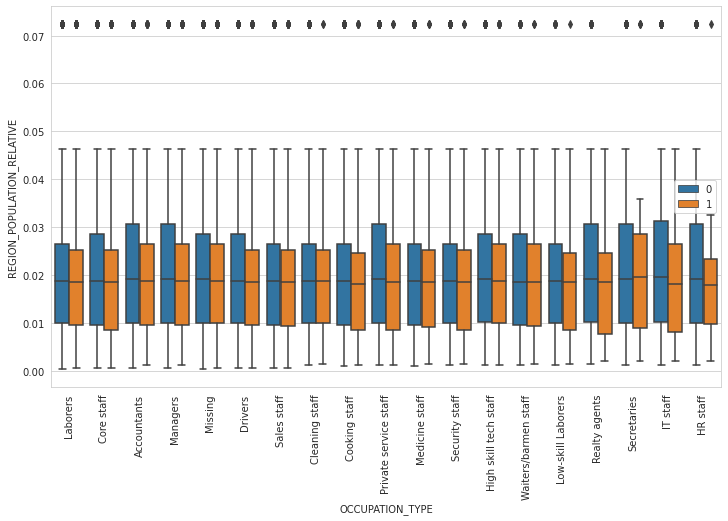

In [106]:
plt.figure(figsize=(12,7))
sns.boxplot(data=appli_data,hue="TARGET",x="OCCUPATION_TYPE",y="REGION_POPULATION_RELATIVE",)
plt.xticks(rotation=90)
plt.legend()

<AxesSubplot:title={'center':'External Sources Score1 vs External Sources Score1'}, xlabel='EXT_SOURCE_3', ylabel='EXT_SOURCE_2'>

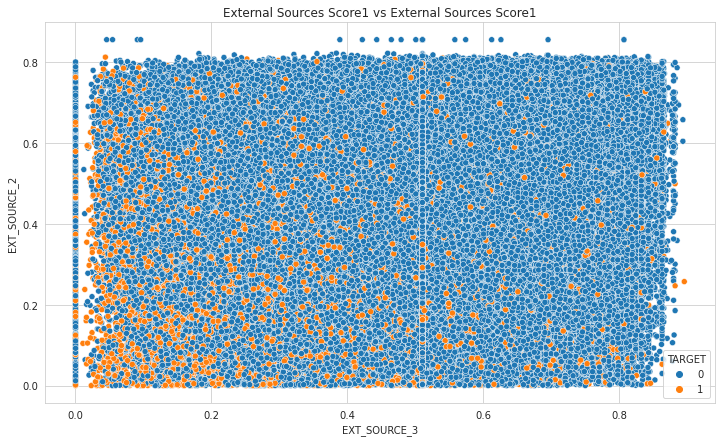

In [107]:
plt.figure(figsize=(12,7))
plt.title("External Sources Score1 vs External Sources Score1")
sns.scatterplot(x=appli_data.EXT_SOURCE_3,y=appli_data.EXT_SOURCE_2,hue=appli_data.TARGET)

* People with low External Credit Scores are the Poeple With More Loan Repayment Defaulters. they are the people with more difficulty to repay the loan.

# Prev Application Datasets

In [108]:
prev=pd.read_csv("previous_application.csv")
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [110]:
missing=prev.isna().mean().sort_values(ascending =False)*100
missing=missing[missing>0]
missing

RATE_INTEREST_PRIVILEGED     99.643698
RATE_INTEREST_PRIMARY        99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
NFLAG_INSURED_ON_APPROVAL    40.298129
DAYS_TERMINATION             40.298129
DAYS_LAST_DUE                40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_FIRST_DUE               40.298129
DAYS_FIRST_DRAWING           40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

* we will drop the columns with >20% missing values and rest we will impute them by median 

In [111]:
prev.drop(missing[missing>20].index,axis=1,inplace=True)

In [112]:
prev.PRODUCT_COMBINATION.mode()

0    Cash
Name: PRODUCT_COMBINATION, dtype: object

In [113]:
prev.PRODUCT_COMBINATION=prev.PRODUCT_COMBINATION.fillna("Cash")

In [114]:
prev.AMT_CREDIT.mode()

0    0.0
Name: AMT_CREDIT, dtype: float64

In [115]:
prev.AMT_CREDIT=prev.AMT_CREDIT.fillna(0)

In [116]:
final_df=pd.merge(appli_data,prev,on='SK_ID_CURR',how='inner')

In [117]:
final_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_APPLICATION,AMT_CREDIT_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-3648.0,-2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,900000.0,1035882.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,337500.0,348637.5,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1186.0,-291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,68809.5,68053.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apa

## Lets Continue with some More analysis

<AxesSubplot:title={'center':'Type Previous Loan Applications'}, ylabel='NAME_CONTRACT_TYPE_y'>

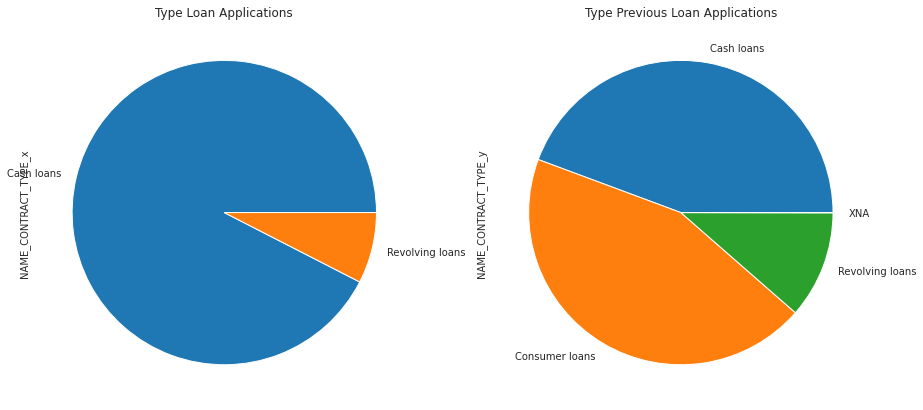

In [118]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Type Loan Applications")
final_df.NAME_CONTRACT_TYPE_x.value_counts().plot.pie()

plt.subplot(1,2,2)
plt.title("Type Previous Loan Applications")
final_df.NAME_CONTRACT_TYPE_y.value_counts().plot.pie()

In [119]:
final_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:title={'center':'Loan Status'}, ylabel='NAME_CONTRACT_STATUS'>

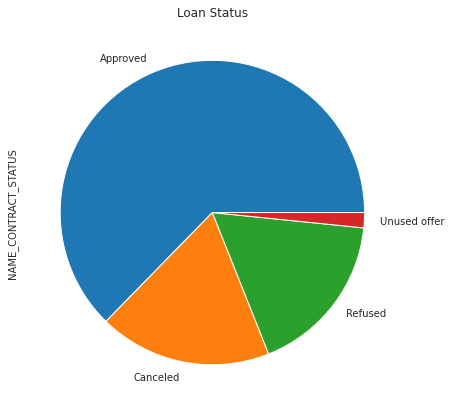

In [120]:
plt.figure(figsize=(12,7))
plt.title("Loan Status")
final_df.NAME_CONTRACT_STATUS.value_counts().plot.pie()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


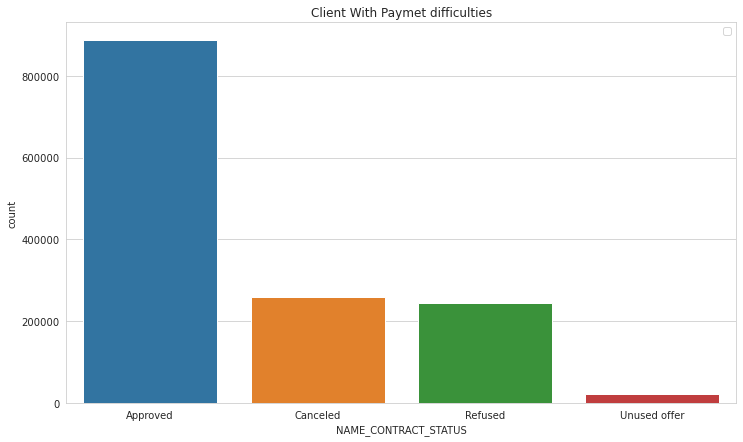

In [121]:
plt.figure(figsize=(12,7))
plt.title("Client With Paymet difficulties")
tgt=final_df.where(final_df.TARGET==1)
sns.countplot(final_df.NAME_CONTRACT_STATUS)
plt.legend()

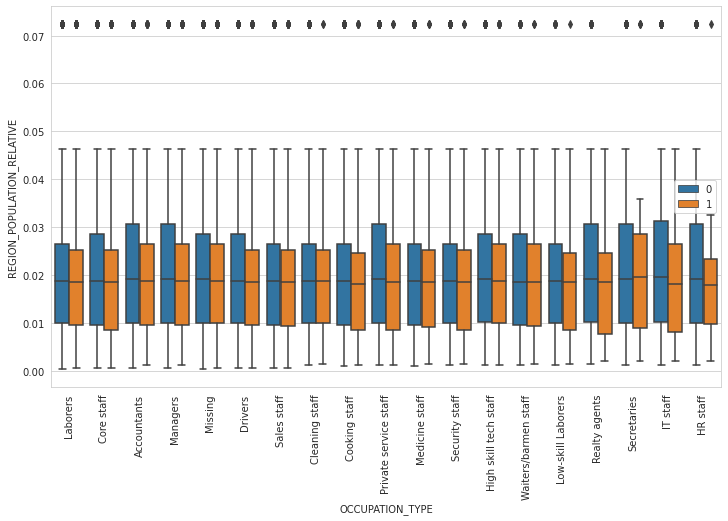

In [122]:
plt.figure(figsize=(12,7))
sns.boxplot(data=appli_data,hue="TARGET",x="OCCUPATION_TYPE",y="REGION_POPULATION_RELATIVE",)
plt.xticks(rotation=90)
plt.legend()

<AxesSubplot:title={'center':'Cient Type'}, ylabel='NAME_CLIENT_TYPE'>

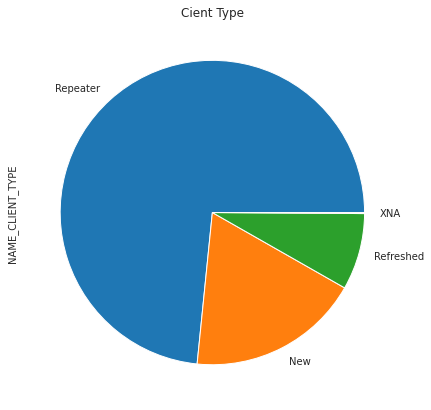

In [123]:
plt.figure(figsize=(12,7))
plt.title("Cient Type")
final_df.NAME_CLIENT_TYPE.value_counts().plot.pie()

In [124]:
final_df.NAME_CLIENT_TYPE.value_counts(normalize=True) * 100

Repeater     73.401801
New          18.358903
Refreshed     8.130149
XNA           0.109146
Name: NAME_CLIENT_TYPE, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


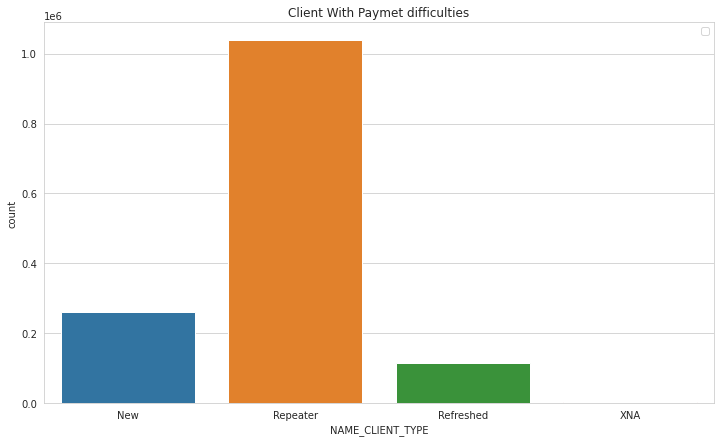

In [125]:
plt.figure(figsize=(12,7))
plt.title("Client With Paymet difficulties")
tgt=final_df.where(final_df.TARGET==1)
sns.countplot(final_df.NAME_CLIENT_TYPE)
plt.legend()

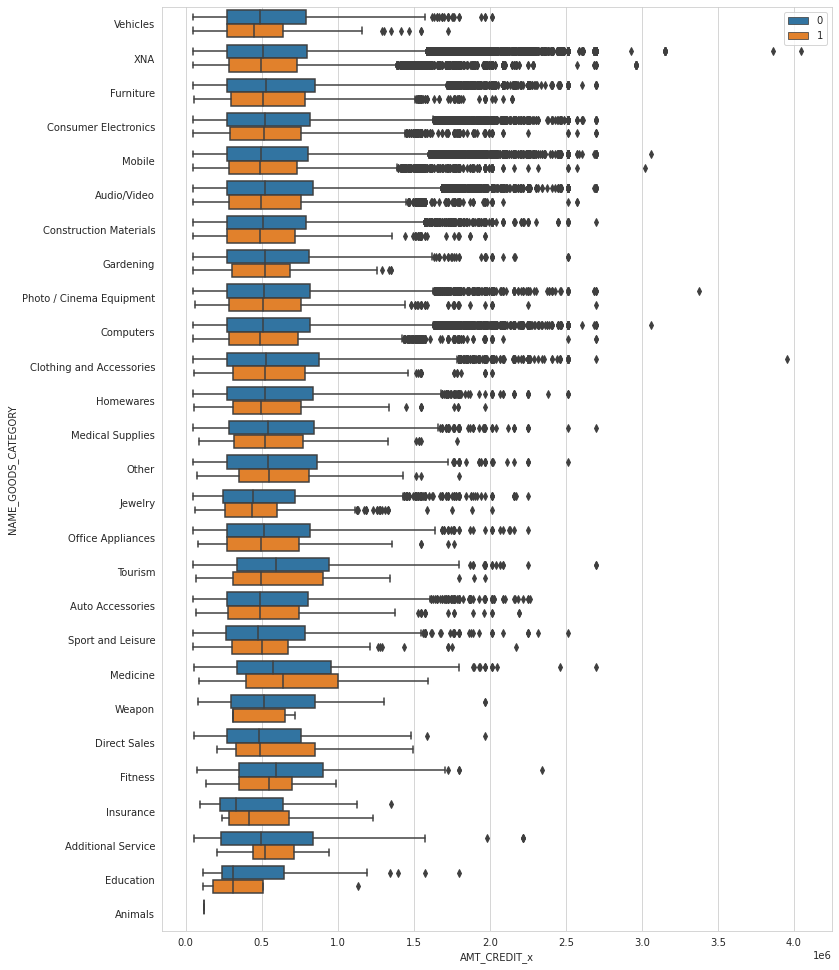

In [126]:
plt.figure(figsize=(12,17))
sns.boxplot(data=final_df,hue="TARGET",x="AMT_CREDIT_x",y="NAME_GOODS_CATEGORY",)
plt.legend()

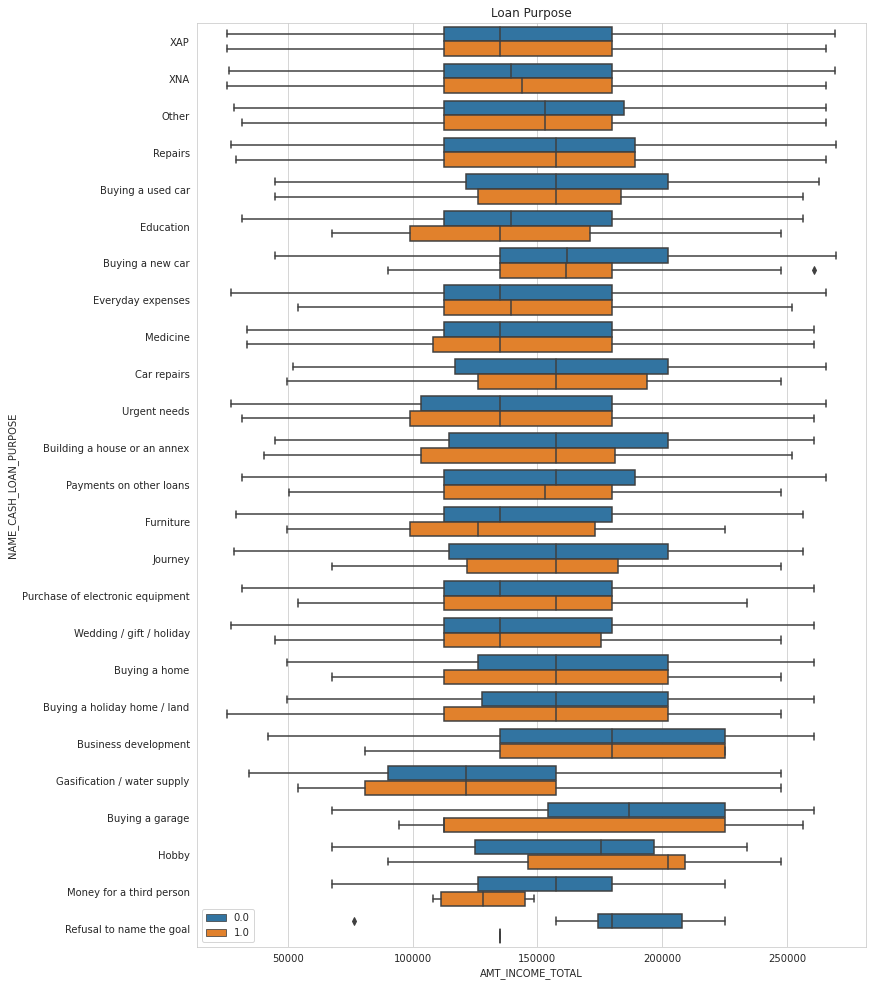

In [127]:
plt.figure(figsize=(12,17))
plt.title("Loan Purpose")
dta=final_df.where(final_df.AMT_INCOME_TOTAL<270000.0)
sns.boxplot(data=dta,hue="TARGET",x="AMT_INCOME_TOTAL",y="NAME_CASH_LOAN_PURPOSE",)
plt.legend()

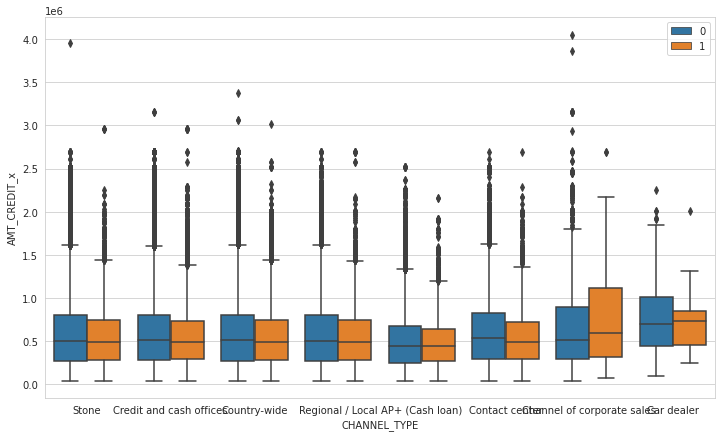

In [128]:
plt.figure(figsize=(12,7))
sns.boxplot(data=final_df,hue="TARGET",y="AMT_CREDIT_x",x="CHANNEL_TYPE",)
plt.legend()

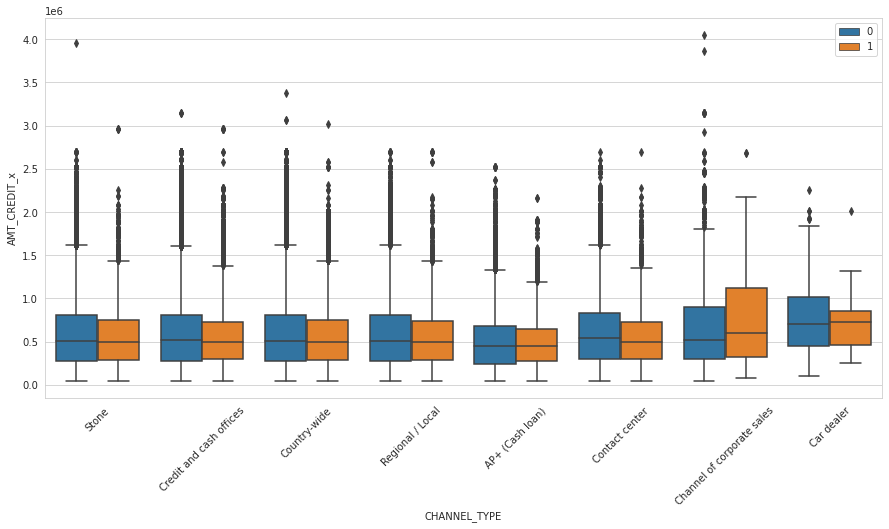

In [129]:
plt.figure(figsize=(15,7))
sns.boxplot(data=final_df,hue="TARGET",y="AMT_CREDIT_x",x="CHANNEL_TYPE",)
plt.xticks(rotation=45)
plt.legend()

## OBSERVATIONS

* People who took loan with high credit have difficulty in repaying the Loan

* People With low External Score have difficulties with the payment

* It is Better to Give Loans to Students and Business man  as they have less difficulty in repaying it 

* Number of people taking Revolving Loans are reducing Gradually

* People Who took loan for building house/land, Gasification with high credit have difficulty to repay the loan

* The Client Who repeatedly takes the Loan has are the most loan defaulters.

* People With are Taking More Cash Loans Than other loan


